In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets, model_selection, linear_model, metrics, preprocessing, neighbors, tree, ensemble, svm

In [3]:
iris_data = datasets.load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
x= pd.DataFrame(iris_data.data, columns= iris_data.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y= pd.DataFrame(iris_data.target, columns= ['labels'])
y

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
x,y = datasets.load_iris(return_X_y= True)
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
x.shape

(150, 4)

In [9]:
y.shape

(150,)

In [10]:
# stratify -> avoid bias , test_size -> split , random_state -> seed
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.1, random_state= 42, stratify= y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

# Linear Regression

In [11]:
x,y = datasets.load_diabetes(return_X_y= True)
x.shape, y.shape

((442, 10), (442,))

In [12]:
y_normalize= preprocessing.MinMaxScaler()
y_norm = y_normalize.fit_transform(y.reshape(-1,1))

y_norm

array([[0.39252336],
       [0.15576324],
       [0.36137072],
       [0.56386293],
       [0.34267913],
       [0.22429907],
       [0.35202492],
       [0.11838006],
       [0.26479751],
       [0.88785047],
       [0.23676012],
       [0.13707165],
       [0.47975078],
       [0.49844237],
       [0.28971963],
       [0.45482866],
       [0.43925234],
       [0.37071651],
       [0.22429907],
       [0.44548287],
       [0.13395639],
       [0.07476636],
       [0.13395639],
       [0.68535826],
       [0.4953271 ],
       [0.55140187],
       [0.34890966],
       [0.18691589],
       [0.33021807],
       [0.80373832],
       [0.32398754],
       [0.105919  ],
       [0.98442368],
       [0.19314642],
       [0.12461059],
       [0.23987539],
       [0.74766355],
       [0.78193146],
       [0.70716511],
       [0.20249221],
       [0.23364486],
       [0.09345794],
       [0.11214953],
       [0.20872274],
       [0.72897196],
       [0.08722741],
       [0.51401869],
       [0.364

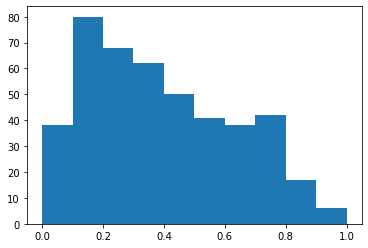

In [13]:
plt.hist(y_norm)
plt.show() # between 0 and 1

In [14]:
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)
x_norm

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41855058, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43655059, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06020733, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98558469,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93615545, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08871747,  0.06442552]])

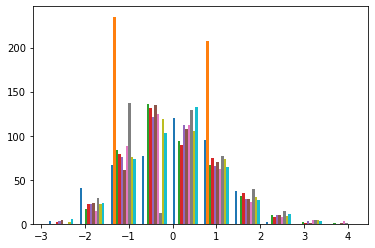

In [15]:
plt.hist(x_norm)
plt.show() # The center is 0

In [16]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y_norm.reshape(-1), test_size= 0.1,
                                                                    random_state= 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [17]:
r = linear_model.LinearRegression()
r.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = r.predict(x_test)
y_pred

array([0.36780752, 0.47572972, 0.34206104, 0.82138703, 0.30711618,
       0.22319002, 0.70937276, 0.49381817, 0.21484451, 0.26427776,
       0.22755915, 0.44739884, 0.10310777, 0.56569974, 0.24114593,
       0.32790322, 0.60142396, 0.6882266 , 0.5241231 , 0.58993599,
       0.57267221, 0.20422633, 0.15312476, 0.50505183, 0.40923495,
       0.41265972, 0.49587965, 0.47408187, 0.08486802, 0.26687457,
       0.46435883, 0.20529129, 0.33669685, 0.49292799, 0.46397898,
       0.51355913, 0.31421989, 0.30072866, 0.38613381, 0.11161503,
       0.16000973, 0.25358943, 0.42742908, 0.39922359, 0.46489107])

In [19]:
metrics.mean_squared_error(y_test, y_pred)

0.026629012206489132

In [20]:
metrics.mean_squared_error(y_pred, y_test)

0.026629012206489132

# Logistic Regression (Classification)

In [21]:
x,y= datasets.load_breast_cancer(return_X_y= True)
x.shape, y.shape

((569, 30), (569,))

In [22]:
x_normalize= preprocessing.StandardScaler()
x_norm= x_normalize.fit_transform(x)
x_norm

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

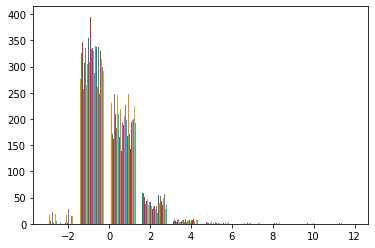

In [23]:
plt.hist(x_norm)
plt.show() # The center is 0

In [24]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y, test_size= 0.1, random_state= 42, stratify= y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512,), (57,))

In [25]:
c = linear_model.LogisticRegression()
c.fit(x_train , y_train)

LogisticRegression()

In [26]:
y_pred = c.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [27]:
metrics.accuracy_score(y_pred, y_test)

0.9649122807017544

In [28]:
metrics.accuracy_score(y_test, y_pred)

0.9649122807017544

# KNN (Classification)

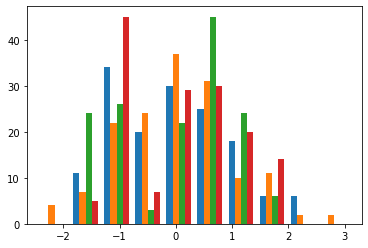

In [29]:
x,y = datasets.load_iris(return_X_y= True)
x_normalize= preprocessing.StandardScaler()
x_norm= x_normalize.fit_transform(x)
plt.hist(x_norm)
plt.show() # The center is 0

In [30]:
x.shape, y.shape, x_norm.shape

((150, 4), (150,), (150, 4))

In [31]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y, test_size= 0.1, random_state= 42, stratify= y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [32]:
k = neighbors.KNeighborsClassifier()
k.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred = k.predict(x_test)

In [34]:
metrics.accuracy_score(y_pred,y_test)

0.9333333333333333

In [35]:
k = neighbors.KNeighborsClassifier(n_neighbors= 7)
k.fit(x_train,y_train)
y_pred = k.predict(x_test)
metrics.accuracy_score(y_pred,y_test)

1.0

### breast_cancer using KNN

In [36]:
x,y = datasets.load_breast_cancer(return_X_y= True)
x_normalize= preprocessing.StandardScaler()
x_norm= x_normalize.fit_transform(x)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y, test_size= 0.1, random_state= 42, stratify= y)

k = neighbors.KNeighborsClassifier(n_neighbors= 3)
k.fit(x_train,y_train)
y_pred = k.predict(x_test)
metrics.accuracy_score(y_pred,y_test)

0.9824561403508771

# Decision Tree (Classification & Regression)

In [37]:
x,y = datasets.load_iris(return_X_y= True)
x_normalize= preprocessing.StandardScaler()
x_norm= x_normalize.fit_transform(x)
x.shape, y.shape, x_norm.shape

((150, 4), (150,), (150, 4))

In [38]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y, test_size= 0.1, random_state= 42, stratify= y)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((135, 4), (135,), (15, 4), (15,))

In [39]:
cl = tree.DecisionTreeClassifier()
cl.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = cl.predict(x_test)
y_pred

array([1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0])

In [41]:
metrics.accuracy_score(y_test, y_pred)

0.8666666666666667

### breast_cancer using Decision Tree

In [42]:
x,y = datasets.load_breast_cancer(return_X_y= True)
x_normalize= preprocessing.StandardScaler()
x_norm= x_normalize.fit_transform(x)
x.shape, y.shape, x_norm.shape

((569, 30), (569,), (569, 30))

In [43]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y, test_size= 0.1, random_state= 42, stratify= y)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((512, 30), (512,), (57, 30), (57,))

In [44]:
cl = tree.DecisionTreeClassifier()
cl.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = cl.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [46]:
metrics.accuracy_score(y_test, y_pred)

0.9473684210526315

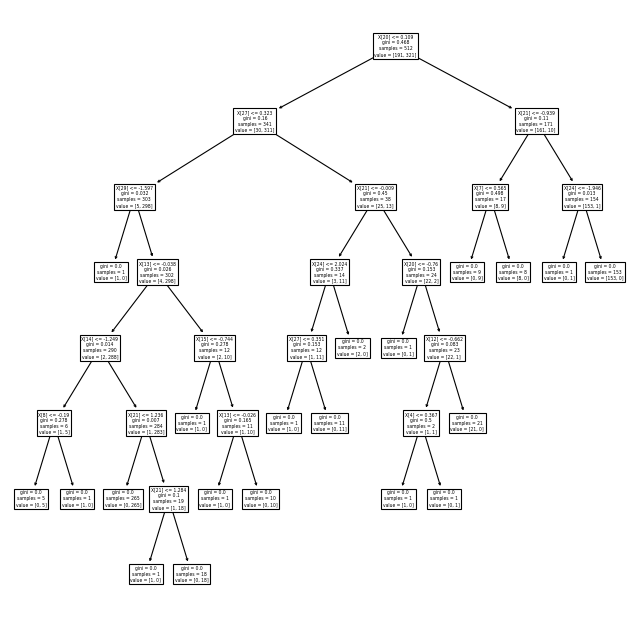

In [47]:
plt.figure(figsize= (10,10), dpi= 80)
tree.plot_tree(cl)
plt.show()

# Random Forest (Classification & Regression)

In [48]:
x,y = datasets.load_breast_cancer(return_X_y= True)
x_normalize= preprocessing.StandardScaler()
x_norm= x_normalize.fit_transform(x)
x_norm.shape

(569, 30)

In [49]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y, test_size= 0.1, random_state= 42, stratify= y)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((512, 30), (512,), (57, 30), (57,))

In [50]:
rf = ensemble.RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred = rf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [52]:
metrics.accuracy_score(y_test,y_pred)

0.9649122807017544

### Random Forest without normalization

In [53]:
x,y = datasets.load_breast_cancer(return_X_y= True)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.1, random_state= 42, stratify= y)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((512, 30), (512,), (57, 30), (57,))

In [54]:
rf = ensemble.RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
metrics.accuracy_score(y_test,y_pred)

0.9649122807017544

### Random Forest with more parameters

In [56]:
# n_estimators -> number of trees , max_depth -> number of levels ,n_jobs -> number of processors
rf = ensemble.RandomForestClassifier(random_state= 42, n_estimators= 100, max_depth= 5 ,n_jobs= -1)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [57]:
metrics.accuracy_score(y_test,y_pred)

0.9649122807017544

# Support Vector Machine (Classification, Regression)

In [58]:
x,y = datasets.load_breast_cancer(return_X_y= True)
x.shape, y.shape

((569, 30), (569,))

In [59]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.1, random_state= 42, stratify= y)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((512, 30), (512,), (57, 30), (57,))

In [60]:
classification_model= svm.SVC()
classification_model.fit(x_train, y_train)

SVC()

In [61]:
y_pred = classification_model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [62]:
metrics.accuracy_score(y_test, y_pred)

0.9298245614035088

In [63]:
classification_model= svm.SVC(kernel= 'linear')
classification_model.fit(x_train, y_train)

SVC(kernel='linear')

In [64]:
y_pred = classification_model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9649122807017544